In [1]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, multivariate_normal

np.set_printoptions(suppress = True)                    # уберем scientific notation

# Задания

№1. Визуализируйте для выборки объема 5000 из распределения Стьюдента с 10-ю степенями свободы, при помощи Гистограммы,
распределение:
- Второго начального выборочного момента
-  Выборочной дисперсии
- Выборочной медианы
- Третьей порядковой статистики, то есть третьего элемента вариационного ряда
- Выборочной квантили уровня 0.8
- Выборочной функции распределения в точке 5

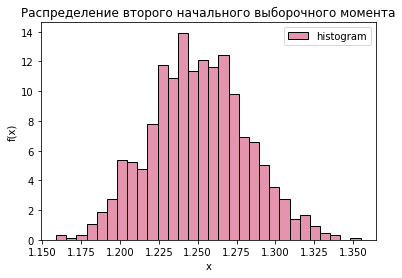

In [14]:
m = 1000                                                
x_mean_2 = np.empty(m)                                    
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_mean_2[i] = np.mean(x_new ** 2)
x_mean_2 = np.sort(x_mean_2)                                
plt.xlabel('x')                                         
plt.ylabel('f(x)')             
plt.title('Распределение второго начального выборочного момента')
seaborn.histplot(x_mean_2, stat = 'density', color = "palevioletred", label = "histogram", bins = 30) 
plt.legend();

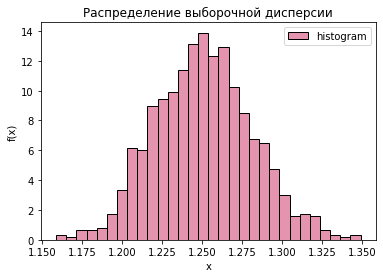

In [15]:
m = 1000                                                
x_var = np.empty(m)                                    
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_var[i] = np.var(x_new)
x_var = np.sort(x_var)                                
plt.xlabel('x')                                         
plt.ylabel('f(x)')             
plt.title('Распределение выборочной дисперсии')
seaborn.histplot(x_var, stat = 'density', color = "palevioletred", label = "histogram", bins = 30) 
plt.legend();

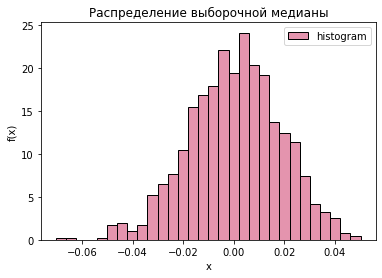

In [16]:
m = 1000                                                
x_med = np.empty(m)                                    
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_med[i] = np.median(x_new)
x_med = np.sort(x_med)                                
plt.xlabel('x')                                         
plt.ylabel('f(x)')             
plt.title('Распределение выборочной медианы')
seaborn.histplot(x_med, stat = 'density', color = "palevioletred", label = "histogram", bins = 30) 
plt.legend();

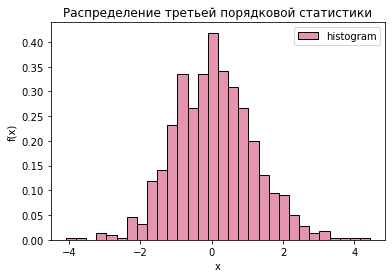

In [34]:
m = 1000                                                
x_3 = np.empty(m)                                    
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_neq = np.sort(x_new)
    x_3[i] = x_new[2]
x_3 = np.sort(x_3)                                
plt.xlabel('x')                                         
plt.ylabel('f(x)')             
plt.title('Распределение третьей порядковой статистики')
seaborn.histplot(x_3, stat = 'density', color = "palevioletred", label = "histogram", bins = 30) 
plt.legend();

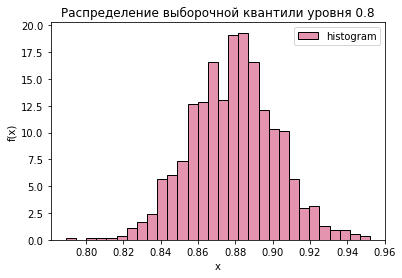

In [18]:
m = 1000                                                
x_quant = np.empty(m)                                    
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_quant[i] = np.quantile(x_new, 0.8)
x_quant = np.sort(x_quant)                                
plt.xlabel('x')                                         
plt.ylabel('f(x)')             
plt.title('Распределение выборочной квантили уровня 0.8')
seaborn.histplot(x_quant, stat = 'density', color = "palevioletred", label = "histogram", bins = 30) 
plt.legend();

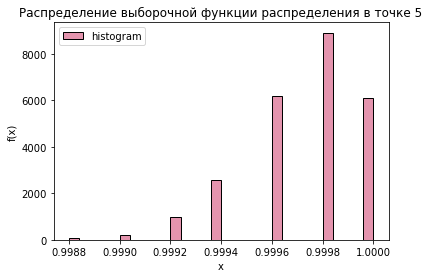

In [19]:
m = 1000                                                
x_dist = np.empty(m)                                    
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_dist[i] = np.mean(x_new <= 5)
x_dist = np.sort(x_dist)                                
plt.xlabel('x')                                         
plt.ylabel('f(x)')             
plt.title('Распределение выборочной функции распределения в точке 5')
seaborn.histplot(x_dist, stat = 'density', color = "palevioletred", label = "histogram", bins = 30) 
plt.legend();

№2. Повторите предыдущий пункт, но визуализируя не выборочные, а истинные распределения. В некоторых пунктах удобно использовать
ЦПТ, в других - распределение необходимо выводить иными способами.

№3. Симулируйте три независимых выборки объемом в 5000 наблюдений из стандартного равномерного распределения. Получите из этих
двух выборок две сложив первую со второй, а вторую - с третьей. Для получившихся выборок:
- Посчитайте выборочную ковариационную матрицу
- Рассчитайте выборочную корреляционную матрицу
- При помощи гистограммы визуализируйте распределение выборочной корреляции

In [20]:
x1 = uniform.rvs(size = 5000) 
x2 = uniform.rvs(size = 5000) 
x3 = uniform.rvs(size = 5000) 
X = x1 + x2
Y = x2 + x3
np.cov(X,Y)

array([[0.166509  , 0.08419508],
       [0.08419508, 0.1664479 ]])

In [21]:
np.corrcoef(X,Y)

array([[1.        , 0.50574163],
       [0.50574163, 1.        ]])

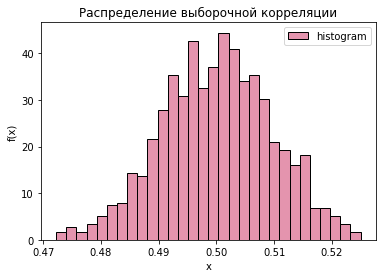

In [22]:
m = 1000                                                
x_corr = np.empty(m)                                    
for i in range(0, m):
    x1 = uniform.rvs(size = 5000) 
    x2 = uniform.rvs(size = 5000) 
    x3 = uniform.rvs(size = 5000) 
    X = x1 + x2
    Y = x2 + x3
    cov = np.mean((X - np.mean(X)) * (Y - np.mean(Y)))
    x_corr[i] = (cov / (math.sqrt(np.var(X) * np.var(Y))))
x_corr = np.sort(x_corr)                                
plt.xlabel('x')                                         
plt.ylabel('f(x)')             
plt.title('Распределение выборочной корреляции')
seaborn.histplot(x_corr, stat = 'density', color = "palevioletred", label = "histogram", bins = 30) 
plt.legend();

№4. Самостоятельно запрограммируйте функции, позволяющие рассчитывать
- Выборочное среднее
- Выборочную дисперсию
- Выборочную медиану
- Порядковые статистики
- Выборочную ковариационную матрицу

In [36]:
x = chi2.rvs(size = 1000, df = 5)

In [37]:
def sample_mean(x):
    return x.sum() / len(x)
print(np.mean(x)) # встроенная функция
print(sample_mean(x)) # моя функция

4.9651286122757154
4.9651286122757154


In [38]:
def sample_var(x):
    return np.sum((x - sample_mean(x))**2)/ len(x)
print(np.var(x)) # встроенная функция
print(sample_var(x)) # моя функция

9.83166704381823
9.83166704381823


In [41]:
def sample_median(x):
    x = np.sort(x)
    n = int(len(x) / 2)
    if len(x) % 2 == 0:
        med = (x[n] + x[n - 1]) / 2
    else:
        med = x[n - 1]
    return med
print(np.median(x)) # встроенная функция
print(sample_median(x)) # моя функция

4.331388239939125
4.331388239939125


In [40]:
def sample_stat(x,i):
    x = np.sort(x)
    return x[i - 1]
print(sample_stat(x, 3)) # моя функция

0.33200695011370934


In [42]:
def sample_cov(X,Y):
    var_X = sample_var(X)
    var_Y = sample_var(Y)
    cov_XY = sample_mean((X - sample_mean(X)) * (Y - sample_mean(Y)))
    sigma = np.array([[var_X, cov_XY],      
                  [cov_XY, var_Y]])
    return sigma
print(np.cov(x1, x2)) # встроенная функция
print(sample_cov(x1, x2)) # моя функция

[[0.08280245 0.00111897]
 [0.00111897 0.08102683]]
[[0.08278588 0.00111874]
 [0.00111874 0.08101062]]


№5. Симулируйте три независимые выборки: две из стандартного нормального распределения и одну из Хи-Квадрат распределения 
с двумя степенями свободы. Сформируйте еще одну выборку сложив квадраты выборок из стандартных нормальных распределений. 
Сравните выборочные характеристики получившейся выборки с выборочными характеристиками выборки из Хи-Квадрат распределения 
с двумя степенями свободы. Сделайте выводы о причинах наблюдаемого сходства в выборочных характеристиках.

In [28]:
x = norm.rvs(size = 5000)
y = norm.rvs(size = 5000)
z = chi2.rvs(size = 5000, df = 2)
xy = x ** 2 + y ** 2

In [29]:
print(np.mean(xy))
print(np.mean(z))

1.9938499834644465
2.0055670775803547


In [30]:
print(np.var(xy))
print(np.var(z))

3.9854948305668905
4.221220314819277


In [31]:
print(np.median(xy))
print(np.median(z))

1.3760018263438762
1.3803424156092727


In [32]:
print(np.var(xy, ddof=1))
print(np.var(z, ddof=1))

3.9862920889846873
4.22206472776483


In [33]:
print(np.mean(xy ** 2))
print(np.mean(z ** 2))

7.960932587128064
8.243519617493483


Сходства в характеристикам наблюдаются потому, что распределение Хи-квадрат само по себе построено на сумме квадратов 
стандартных нормальных распределений, а поскольку мы генерировали распределение Хи-квадрат с двумя степенями свободы и 
складывали также квадраты двух стандартных нормальных величин, итоговые распределения должны были получиться схожими по своим
характеристикам
